### 3. Polynomial Regression

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
dataset= pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
X,y

(    hour
 0    0.2
 1    0.5
 2    0.8
 3    0.9
 4    1.2
 5    2.4
 6    2.5
 7    2.6
 8    2.9
 9    3.1
 10   3.2
 11   3.3
 12   3.7
 13   3.9
 14   4.0
 15   4.1
 16   4.2
 17   4.4
 18   4.7
 19   4.8,
 0       2
 1       4
 2       6
 3       4
 4       6
 5      14
 6      10
 7      12
 8      24
 9      26
 10     32
 11     46
 12     44
 13     52
 14     58
 15     54
 16     68
 17     80
 18     84
 19    100
 Name: score, dtype: int64)

3-1 단순 선형 회귀 (simple linear regression)

In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
reg = LinearRegression()
reg.fit(X,y) # 전체 데이터로 학습

LinearRegression()

In [48]:
y_pre = reg.predict(X)
y_pre

array([-14.17377245,  -8.50256206,  -2.83135167,  -0.94094821,
         4.73026218,  27.41510373,  29.30550719,  31.19591065,
        36.86712104,  40.64792796,  42.53833143,  44.42873489,
        51.99034874,  55.77115566,  57.66155913,  59.55196259,
        61.44236605,  65.22317298,  70.89438336,  72.78478683])

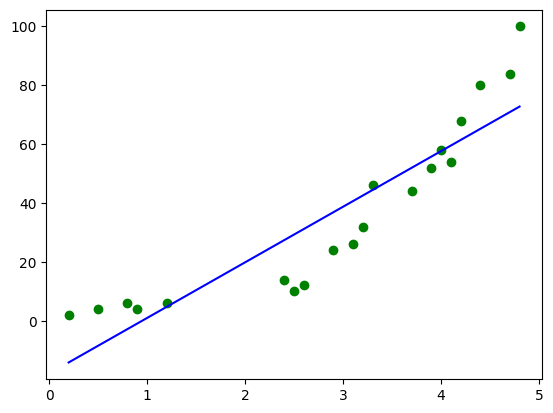

In [49]:
plt.scatter(X,y,color='g')
plt.plot(X,reg.predict(X),color = 'b')


In [50]:
reg.score(X,y) # 전체 데이터를 통한 모델 평가

0.8169296513411765


## 3-2 다항 회귀

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # 2차 다항식
X_poly = poly_reg.fit_transform(X)
# poly_reg.fit()
# poly_reg.transform(X)
X_poly[:5] # [x] -> [x^0, x^1 , x^2] -> x가 3이라면 [1,3,9]로 변환

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [52]:
poly_reg.get_feature_names_out()

array(['1', 'hour', 'hour^2', 'hour^3', 'hour^4'], dtype=object)

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) # 변환된 X 와 y를 가지고 모델 생성 (학습)

LinearRegression()

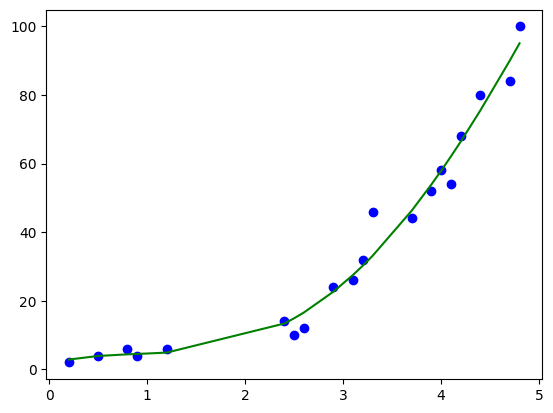

In [54]:
plt.scatter(X,y,color = 'b')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='g')

In [55]:

X_range = np.arange(min(X['hour'].values), max(X['hour'].values) ,0.1) 
# X의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [56]:
max(X['hour'].values)

4.8

In [57]:
X_range = X_range.reshape(len(X_range),1)
# row 개수는 자동으로 계산 (-1) column 개수는 1개
# X랑 같이 2차원 형태로 변환하기
X_range.shape

(46, 1)

In [58]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

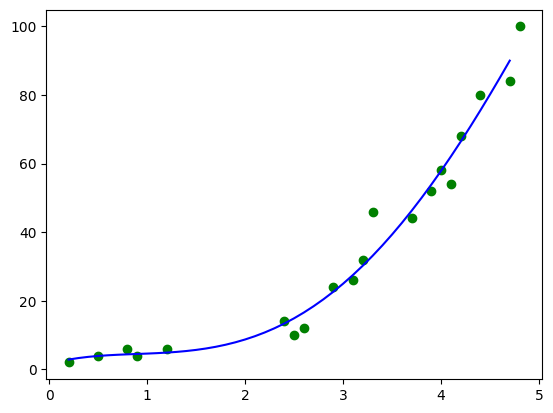

In [59]:
plt.scatter(X,y,color="g")
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color ='b')

In [61]:
reg.predict([[2]]) 
# 2시간 공부했을 때 선형 회귀 모델의 예측

C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.85348988])

In [64]:
lin_reg.predict(poly_reg.fit_transform([[2]]))
# 2시간 공부했을 때 다항 회귀 모델의 예측

array([8.70559135])

In [65]:
lin_reg.score(X_poly,y)

0.9782775579000046